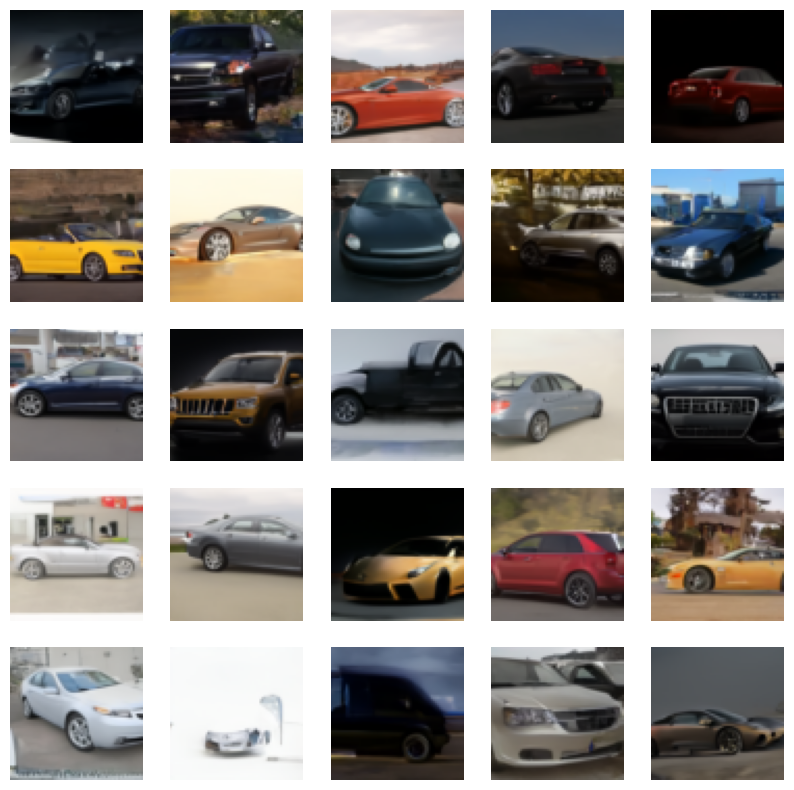

In [1]:
import typing as t
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image

with zipfile.ZipFile("sampled_images/UNet_cars-100-sampling_steps-100_images-class_condn_True.npz") as zf:
    with zf.open("arr_0.npy") as f:
        samples = np.load(f)
    # with zf.open("arr_1.npy") as f:
    #     labels = np.load(f)


# Create 10x10 grid of samples
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        idx = i * 5 + j
        ax: plt.Axes = axes[i, j]
        ax.imshow(samples[idx])
        ax.axis("off")

In [6]:
from arguments import Arguments
from main import GaussianDiffusion, sample_N
from unets import UNet
from data import get_metadata, fix_legacy_dict
import torch

pretrained_model = "trained_models/UNet_afhq-epoch_500-timesteps_1000-class_condn_True_ema_0.9995.pt"


args = Arguments()
args.device = "cuda:0"
args.num_sampled_images = 20
args.sampling_steps = 10

diffusion = GaussianDiffusion(args.diffusion_steps, args.device)
meta = get_metadata("afhq")
model = UNet(
    image_size=meta.image_size,
    in_channels=meta.num_channels,
    out_channels=meta.num_channels,
    num_classes=3
)

with open(pretrained_model, "rb") as f:
    model.load_state_dict(fix_legacy_dict(torch.load(f)), strict=True)

model = model.to(args.device)

sampled_images = sample_N(
    args.num_sampled_images,
    model,
    diffusion,
    "cuda:0",
    3,
    None,
    args.sampling_steps,
    args.batch_size,
    meta.num_channels,
    meta.image_size,
)



100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


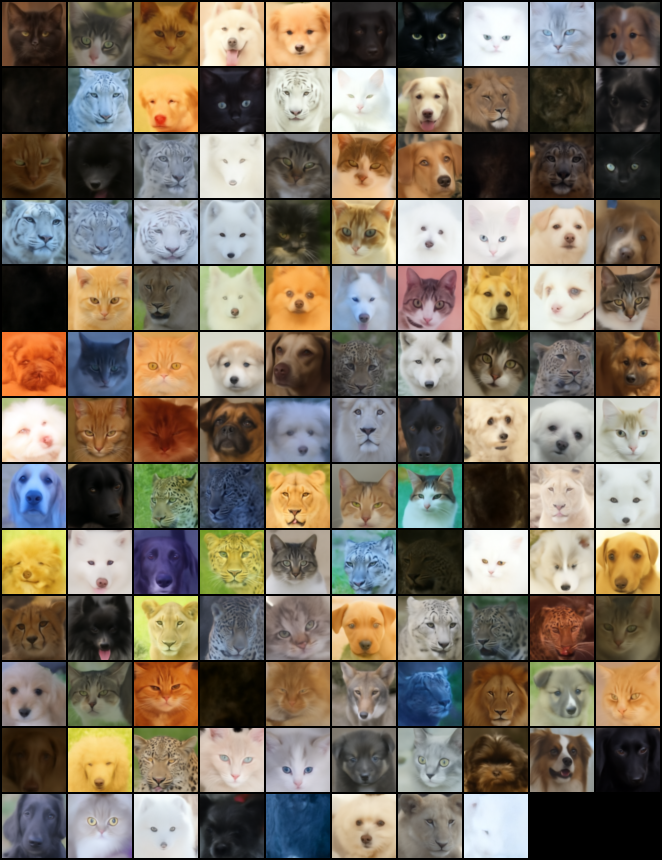

In [7]:
# Turn into grid

to_pil_image(make_grid(sampled_images, nrow=10, normalize=True, range=(-1, 1)))

In [ ]:

# grid.shape

```
python main.py --arch UNet --dataset cars --batch_size 100   \
  --num_sampled_images 100 --sampling_steps 100 --class_cond   \
  --save_samples ./sampled_images/                             \
  --pretrained_ckpt ./trained_models/UNet_cars-epoch_500-timesteps_1000-class_condn_True_ema_0.9995.pt
```


In [ ]:
from torch import nn
import torch
nn.Embedding(10, 10)(torch.Tensor([1]).long())

tensor([[ 1.0382,  0.5491, -0.5793, -0.2854, -2.4040,  1.5751,  1.3077,  1.9407,
          0.9842,  0.2759]], grad_fn=<EmbeddingBackward0>)